## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import pylab as py
import import_ipynb
import Template as t

importing Jupyter notebook from Template.ipynb


Data extraction and preparation has been shown in the notebook ML project 23371 data extraction and preparation. The dataset being loaded was prepared in the aforementioned notebook

In [2]:
df=t.load_data('csv')

Enter path of fileproject_data2.csv


In [3]:
df

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,...,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category
0,Yousuf Store,MPR colony,ADMIN_COMMANDO,2020-12-26 11:28:1608982086,2020-12-30 06:24:1609309466,2020-12-30 13:09:1609333794,NaN,NaN,1655,NaN,...,2021-05-20 11:28:00,2020-12-30 00:00:00,2021-05-20 06:24:00,2020-12-30 00:00:00,2021-05-20 13:09:00,4.0,6.750000,0,NaN,NaN
1,Manzoor Maqsood Wholesale,"Islamia Goth, Karachi",TELESALES_COMMANDO,2020-12-26 06:38:1608964711,1970-01-01 00:00:1,1970-01-01 00:00:1,NaN,NaN,1300,NaN,...,2021-05-20 06:38:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2,nazar,Gulshen iqbal 14 askari park edhi wali gali,CUSTOMER_APP,2020-12-27 12:20:1609071638,2021-01-01 06:14:1609481667,2021-01-01 08:40:1609490422,NaN,NaN,1657,NaN,...,2021-05-20 12:20:00,2021-01-01 00:00:00,2021-05-20 06:14:00,2021-01-01 00:00:00,2021-05-20 08:40:00,5.0,2.433333,0,NaN,NaN
3,nazar,Gulshen iqbal 14 askari park edhi wali gali,CUSTOMER_APP,2020-12-27 12:20:1609071638,2021-01-01 06:14:1609481667,2021-01-01 08:40:1609490422,NaN,NaN,1456,NaN,...,2021-05-20 12:20:00,2021-01-01 00:00:00,2021-05-20 06:14:00,2021-01-01 00:00:00,2021-05-20 08:40:00,5.0,2.433333,0,NaN,NaN
4,nazar,Gulshen iqbal 14 askari park edhi wali gali,CUSTOMER_APP,2020-12-27 12:20:1609071638,2021-01-01 06:14:1609481667,2021-01-01 08:40:1609490422,NaN,NaN,1463,NaN,...,2021-05-20 12:20:00,2021-01-01 00:00:00,2021-05-20 06:14:00,2021-01-01 00:00:00,2021-05-20 08:40:00,5.0,2.433333,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518883,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915065,67.026449,5914112688284,Hamdard Rooh Afza 800 ml,...,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Beverages,Sharbat
518884,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915065,67.026449,5717801435292,Nestle Everyday 375 gm Pack,...,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Tea Whiteners
518885,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915065,67.026449,5620416086172,Nestle Bunyad 260 gm Pack,...,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Powder Milk
518886,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915065,67.026449,711809575459533000,Olper's Full Cream Milk 1.5 L Pack,...,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Liquid Milk


In [4]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9813
customer_shipping_address,0.0,605,8685
channel,0.0,0,4
order_placement_date,0.0,0,137263
picked_timestamp,0.0,0,127261
drop_timestamp,0.0,0,107156
lat,27.0,140519,11530
lng,27.0,140519,11486
item_id,0.0,0,2064
item_name,3.0,17563,888


In [5]:
df[['item_name','Category','Sub Category']].loc[df['Category'].isnull()].isnull().sum()

item_name       17563
Category        17563
Sub Category    17563
dtype: int64

Enter the type of chart requiredmatrix


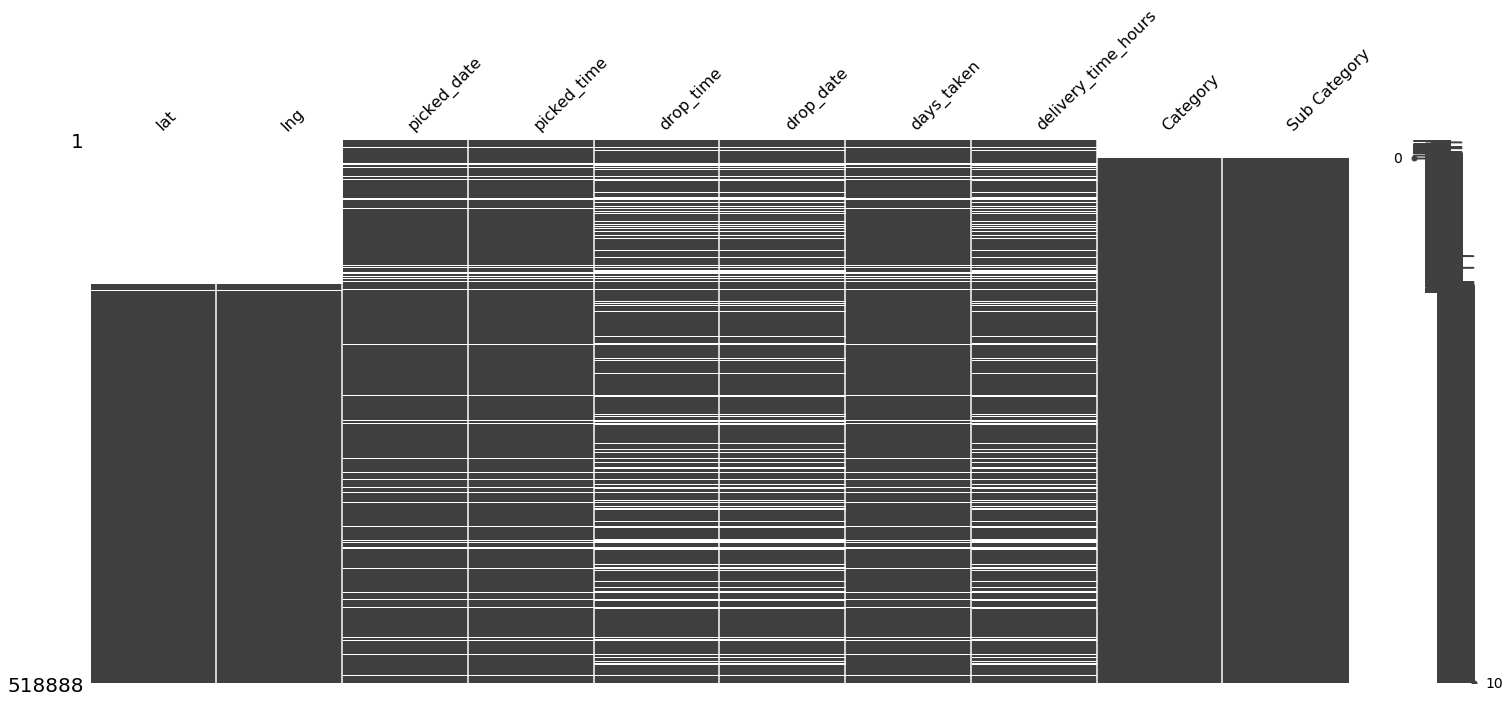

In [6]:
t.missing_analysis(df,'lat','lng','picked_date','picked_time','drop_time','drop_date','days_taken','delivery_time_hours','Category','Sub Category')

Since the date and time columns were extracted from each other therefore they show a similar missing pattern

Enter the type of chart requiredheatmap


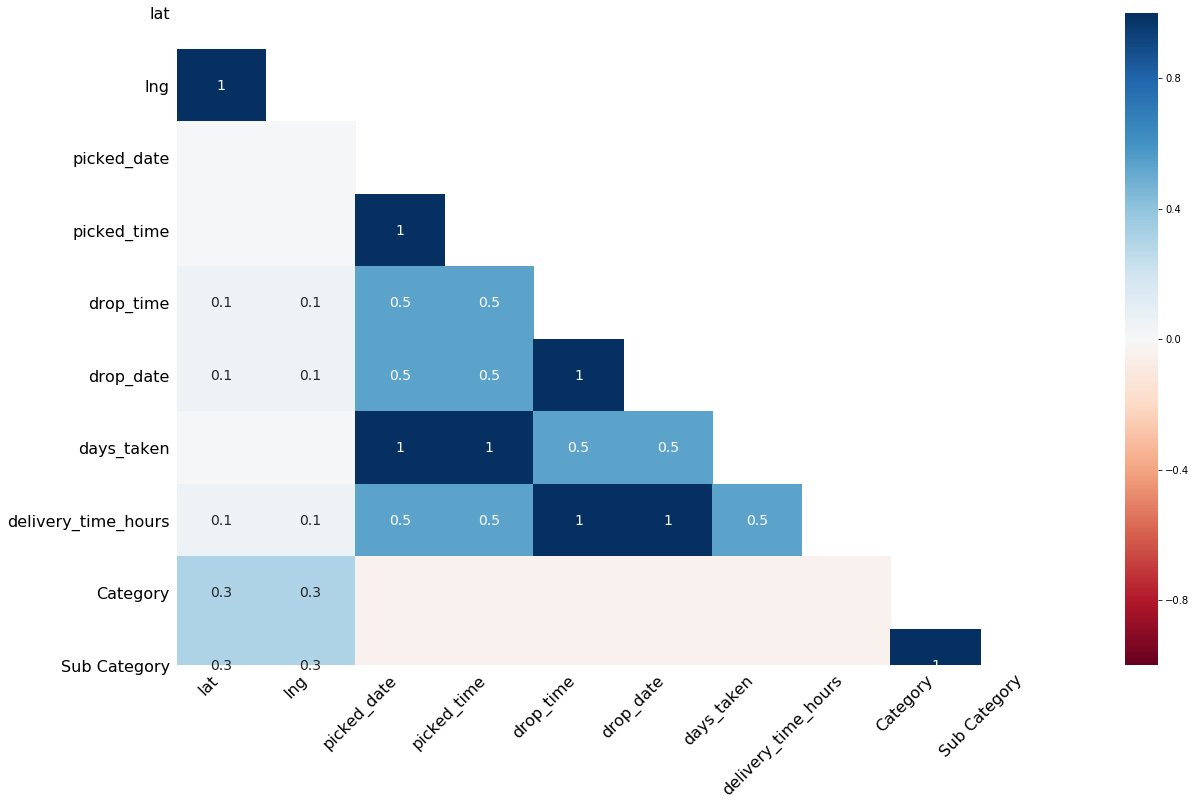

In [7]:
t.missing_analysis(df,'lat','lng','picked_date','picked_time','drop_time','drop_date','days_taken','delivery_time_hours','Category','Sub Category')

Enter the type of chart requireddendrogram


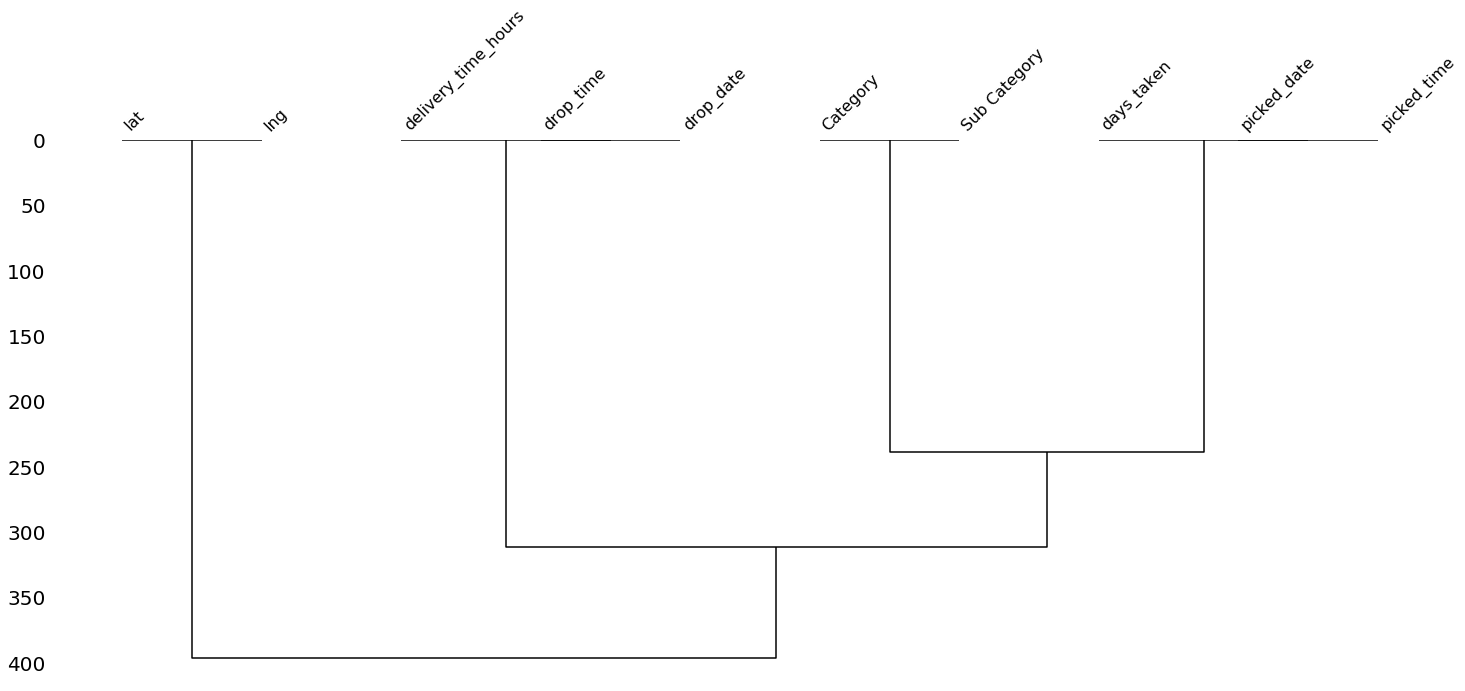

In [9]:
t.missing_analysis(df,'lat','lng','picked_date','picked_time','drop_time','drop_date','days_taken','delivery_time_hours','Category','Sub Category')

It has been observed that system assigns a value of 0 for lat and long for those customers who turn off their gps location while placing order via mobile application. In previous notebook zeros were replaced with np.nan which unfortunately was an incorrect approach.

In [6]:
t.handle_mv(df,'lat','value')

Enter value to replace null values0


In [7]:
t.handle_mv(df,'lng','value')

Enter value to replace null values0


In [8]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9813
customer_shipping_address,0.0,605,8685
channel,0.0,0,4
order_placement_date,0.0,0,137263
picked_timestamp,0.0,0,127261
drop_timestamp,0.0,0,107156
lat,0.0,0,11531
lng,0.0,0,11487
item_id,0.0,0,2064
item_name,3.0,17563,888


Null values in item name.category and sub category have been dropped as they are less than 5%. Also the records which have null values in these three columns are same.

In [9]:
t.handle_mv(df,'item_name','drop')

In [10]:
t.handle_mv(df,'Category','drop')
t.handle_mv(df,'Sub Category','drop')

In [11]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9412
customer_shipping_address,0.0,581,8629
channel,0.0,0,4
order_placement_date,0.0,0,131996
picked_timestamp,0.0,0,122144
drop_timestamp,0.0,0,102596
lat,0.0,0,11531
lng,0.0,0,11487
item_id,0.0,0,2049
item_name,0.0,0,888


Null values in address have been filled by the phrase 'unknwon'

In [12]:
t.handle_mv(df,'customer_shipping_address','value')

Enter value to replace null valuesunknown


In [13]:
t.change_type(df,'lat','float')
t.change_type(df,'lng','float')


In [14]:
df.dtypes

customer_store_name           object
customer_shipping_address     object
channel                       object
order_placement_date          object
picked_timestamp              object
drop_timestamp                object
lat                          float32
lng                          float32
item_id                        int64
item_name                     object
shipped_quantity               int64
delivered_quantity             int64
shipped_status                object
delivered_status              object
unit_price                   float64
total_amount_expected        float64
order_date                    object
order_time                    object
picked_date                   object
picked_time                   object
drop_date                     object
drop_time                     object
days_taken                   float64
delivery_time_hours          float64
return                         int64
Category                      object
Sub Category                  object
d

In [15]:
t.missing_details(df)


,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9412
customer_shipping_address,0.0,0,8630
channel,0.0,0,4
order_placement_date,0.0,0,131996
picked_timestamp,0.0,0,122144
drop_timestamp,0.0,0,102596
lat,0.0,0,10846
lng,0.0,0,9301
item_id,0.0,0,2049
item_name,0.0,0,888


Null values in days taken have been replaced with median number of days

In [16]:
t.handle_mv(df,'days_taken','median')

delivery time has been imputed on the basis of address. Median for each address has been replaced 

In [17]:
t.handle_mv(df,'delivery_time_hours','group_median')

Enter name of second columncustomer_shipping_address


Template.ipynb:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "def overview(df,head,n):\n",


In [18]:
t.missing_details(df)


,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9412
customer_shipping_address,0.0,0,8630
channel,0.0,0,4
order_placement_date,0.0,0,131996
picked_timestamp,0.0,0,122144
drop_timestamp,0.0,0,102596
lat,0.0,0,10846
lng,0.0,0,9301
item_id,0.0,0,2049
item_name,0.0,0,888


There are still some missing valules in delivery time hence they have been replaced by over all median

In [19]:
t.handle_mv(df,'delivery_time_hours','median')

In [20]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9412
customer_shipping_address,0.0,0,8630
channel,0.0,0,4
order_placement_date,0.0,0,131996
picked_timestamp,0.0,0,122144
drop_timestamp,0.0,0,102596
lat,0.0,0,10846
lng,0.0,0,9301
item_id,0.0,0,2049
item_name,0.0,0,888


In [22]:
df.to_csv('cleaned_data.csv',index=False)